In [12]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import os

import IPython.display as ipd

In [16]:
small_audio = 'fma_small/fma_small'

In [19]:
def get_tids_from_directory(audio_dir):
    tids = []
    for _,dirnames, files in os.walk(audio_dir):
        if dirnames == []:
            tids.extend(int(file[:-4]) for file in files)
    return tids

def get_audio_path(audio_dir, track_id):
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')

In [20]:
tids = get_tids_from_directory(small_audio)
print(len(tids))

8000


In [21]:
def create_melSpect(track_id):
    filename = get_audio_path(small_audio, track_id)
    y, sr = librosa.load(filename)
    spect = librosa.feature.melspectrogram(y = y, sr = sr, n_fft = 2048, hop_length = 1024)
    spect = librosa.power_to_db(spect, ref = np.max)
    return spect.T

In [24]:
def plot_spect(track_id):
    spect = create_melSpect(track_id)
    print(spect.shape)
    plt.figure(figsize = (10, 4))
    librosa.display.specshow(spect.T, y_axis = 'mel', fmax = 8000, x_axis = 'time')
    plt.colorbar(format = '%+2.0f dB')
    plt.show()

In [29]:
def play_audio(track_id):
    filename = get_audio_path(small_audio, track_id)
    print('File: {}'.format(filename))

    x, sr = librosa.load(filename, sr=None, mono=True)
    print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

    start, end = 7, 17
    clip = ipd.Audio(data=x[start*sr:end*sr], rate=sr)
    return clip

(646, 128)


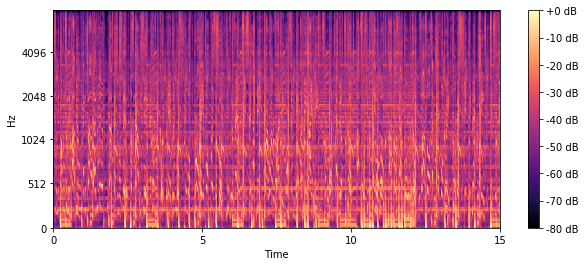

In [25]:
# hip-hop
plot_spect(2)

In [31]:
# hip-hop
play_audio(2)

File: fma_small/fma_small\000\000002.mp3
Duration: 29.98s, 1321967 samples
